<a href="https://colab.research.google.com/github/AcimGithub/PCVK_Genap_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 10**

2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

In [3]:
def global_threshold(image, method):
  threshold = 170
  image = np.array(image)

  if method == 'BINARY':
    segmented_image = np.where(image < threshold, 0, 255)
  elif method == 'BINARY_INV':
    segmented_image = np.where(image > threshold, 0, 255)
  elif method == 'TRUNC':
    segmented_image = np.where(image > threshold, threshold, image)
  elif method == 'TOZERO':
    segmented_image = np.where(image < threshold, 0, image)
  elif method == 'TOZERO_INV':
    segmented_image = np.where(image > threshold, 0, image)


  return segmented_image

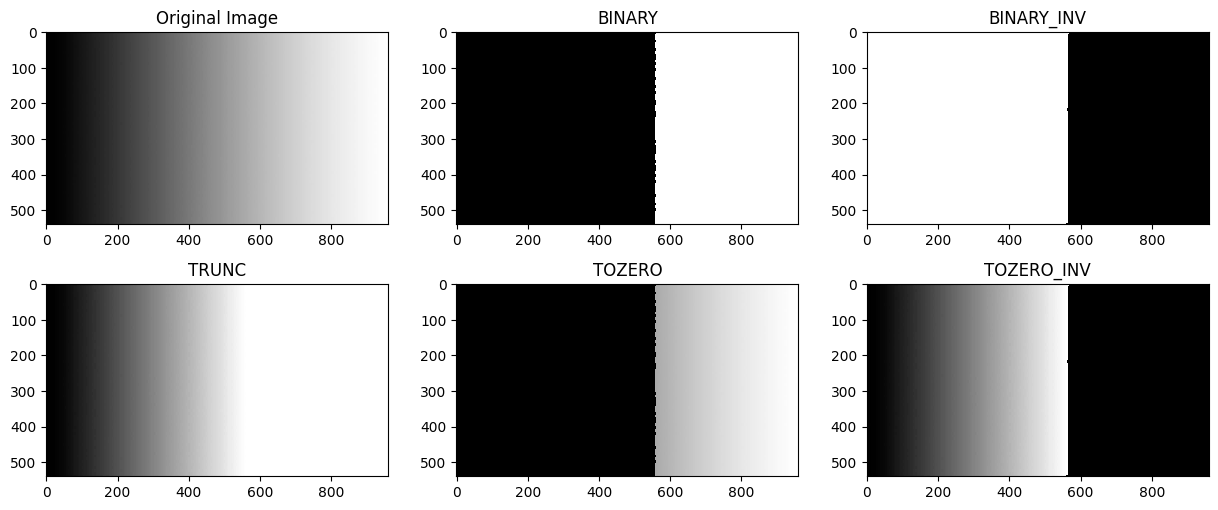

In [4]:
gradient_img = cv2.imread('/content/drive/MyDrive/Foto/gradient.jpg', cv2.IMREAD_GRAYSCALE)

titles1 = [
    'Original Image',
    'BINARY',
    'BINARY_INV',
    'TRUNC',
    'TOZERO',
    'TOZERO_INV',
]
global_threshold_img = [
    gradient_img,
    global_threshold(gradient_img, 'BINARY'),
    global_threshold(gradient_img, 'BINARY_INV'),
    global_threshold(gradient_img, 'TRUNC'),
    global_threshold(gradient_img, 'TOZERO'),
    global_threshold(gradient_img, 'TOZERO_INV'),
]


plt.figure(figsize=(15, 6))

for i in range(len(global_threshold_img)):
    plt.subplot(2, 3, i + 1), plt.imshow(global_threshold_img[i], 'gray', interpolation='nearest')
    plt.title(titles1[i])

plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

In [5]:
balloon_img = cv2.imread('/content/drive/MyDrive/Foto/balloon.jpg', cv2.IMREAD_GRAYSCALE)

def otsu_threshold(image):
  if len(image.shape) == 3:
    image = np.mean(image, axis=2).astype(np.uint8)

  # Set total number of bins in the histogram
  bins_num = 256

  # Get the image histogram
  hist, bin_edges = np.histogram(image, bins=bins_num)

  # Calculate centers of bins
  bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

  # Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
  weight1 = np.cumsum(hist)
  weight2 = np.cumsum(hist[::-1])[::-1]

  # Get the class means mu0(t)
  mean1 = np.cumsum(hist * bin_mids) / weight1
  # Get the class means mu1(t)
  mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

  inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

  # Maximize the inter_class_variance function val
  index_of_max_val = np.argmax(inter_class_variance)

  threshold = bin_mids[:-1][index_of_max_val]

  thresholded_image = (image > threshold) * 255

  return thresholded_image

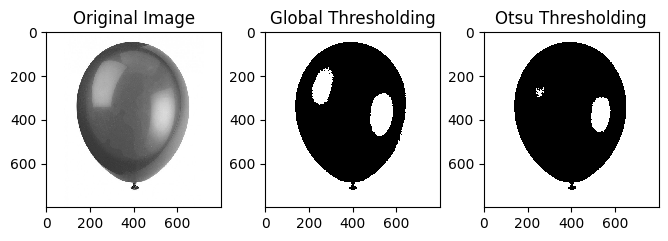

In [6]:
titles2 = [
    'Original Image',
    'Global Thresholding',
    'Otsu Thresholding',
]

otsu_threshold_img = [
    balloon_img,
    global_threshold(balloon_img, 'BINARY'),
    otsu_threshold(balloon_img),
]


plt.figure(figsize=(8, 5))

for i in range(len(otsu_threshold_img)):
    plt.subplot(2, 3, i + 1), plt.imshow(otsu_threshold_img[i], 'gray', interpolation='nearest')
    plt.title(titles2[i])

plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:
* Anda dapat gunakan cv.calcHist untuk menampilkan histogram.
* Buka link berikut https://opencvtutorial.
readthedocs.io/en/latest/histogram/histogram.html
* Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

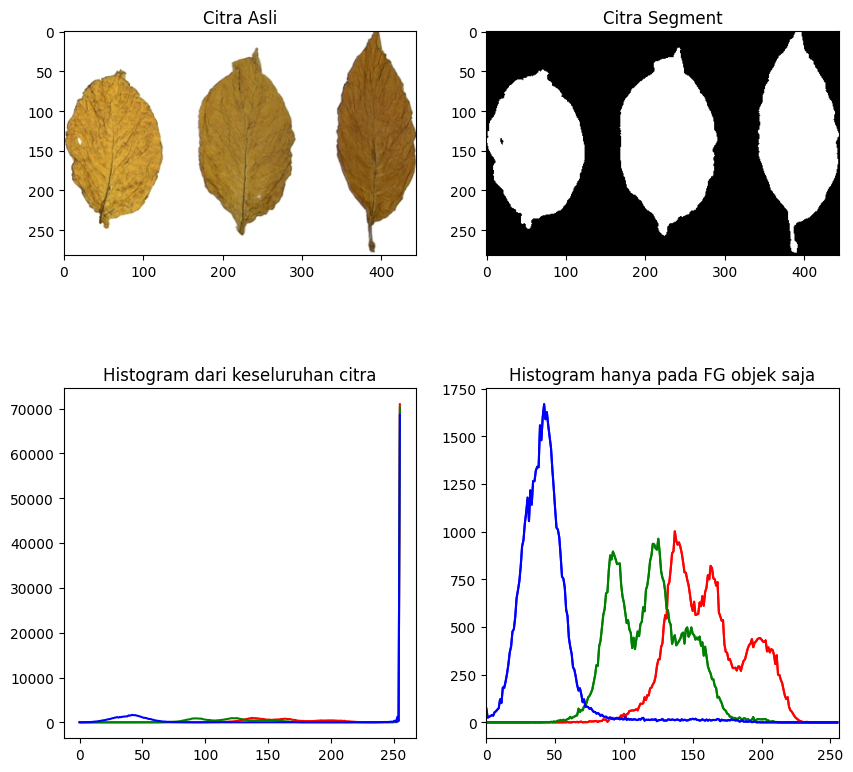

In [7]:
tobacco_img = cv2.imread('/content/drive/MyDrive/Foto/tobacco.jpg')
tobacco_img = cv2.cvtColor(tobacco_img,cv2.COLOR_BGR2RGB)
tobacco_img_gray = cv2.cvtColor(tobacco_img,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(tobacco_img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(tobacco_img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([tobacco_img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([tobacco_img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([tobacco_img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


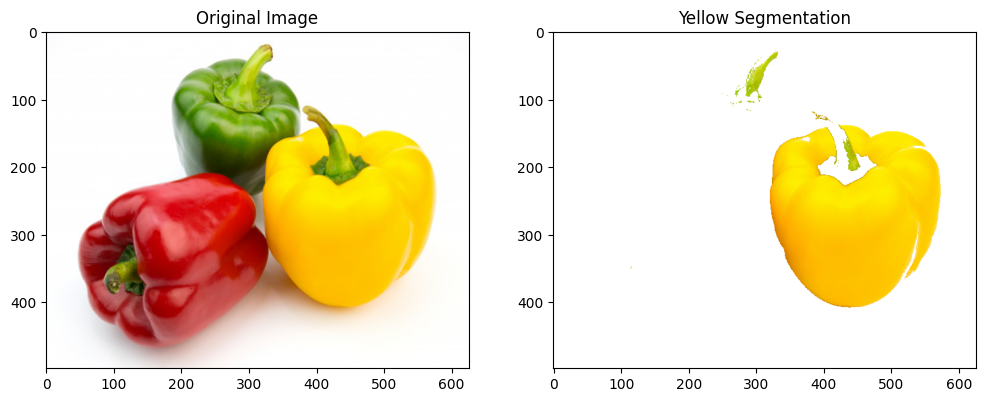

In [8]:
from sklearn.cluster import KMeans

peppers_img = cv2.imread('/content/drive/MyDrive/Foto/peppers.jpg')
peppers_img_rgb = cv2.cvtColor(peppers_img, cv2.COLOR_BGR2RGB)

# Convert the image to a 2D array of pixels
pixels = peppers_img_rgb.reshape((-1, 3))

# Define the number of clusters (in this case, for yellow color)
num_clusters = 5  # Adjust this value as needed

# Create the K-Means model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the pixel data
kmeans.fit(pixels)

# Get the cluster centers (colors)
colors = kmeans.cluster_centers_

# Find the cluster that represents the yellow color
yellow_cluster = None
min_distance = float('inf')

for i, color in enumerate(colors):
    # Define a reference yellow color
    reference_yellow = np.array([255, 255, 0], dtype=np.uint8)

    # Calculate the Euclidean distance between the color and reference_yellow
    distance = np.linalg.norm(color - reference_yellow)

    if distance < min_distance:
        min_distance = distance
        yellow_cluster = i

# Create a mask for the yellow cluster
yellow_mask = (kmeans.labels_ == yellow_cluster)

# Reshape the mask to match the image dimensions
yellow_mask = yellow_mask.reshape(peppers_img.shape[0], peppers_img.shape[1])

# Create a white background image
white_background = np.full_like(peppers_img, (255, 255, 255), dtype=np.uint8)

# Apply the mask to the white background
output_image = np.where(yellow_mask[..., None], peppers_img, white_background)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(peppers_img_rgb), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)), plt.title('Yellow Segmentation')
plt.show()

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.

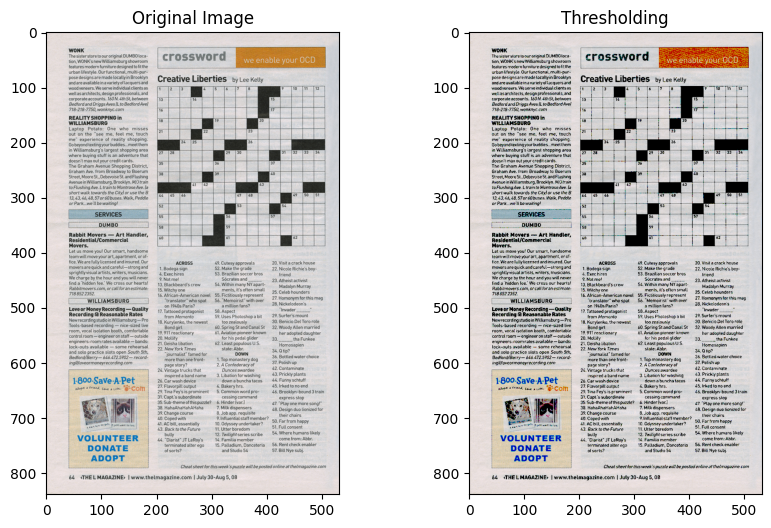

In [9]:
crossword_img = cv2.imread('/content/drive/MyDrive/Foto/crossword.jpg')
crossword_img = cv2.cvtColor(crossword_img, cv2.COLOR_BGR2RGB)

thresh = cv2.threshold(crossword_img, 125, 255, cv2.THRESH_TOZERO)

# Display the results
plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(crossword_img), plt.title('Original Image')
plt.subplot(122), plt.imshow(thresh[1]), plt.title('Thresholding')
plt.show()